CE080_Vedant_Parikh

Machine Learning

Lab : 10

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

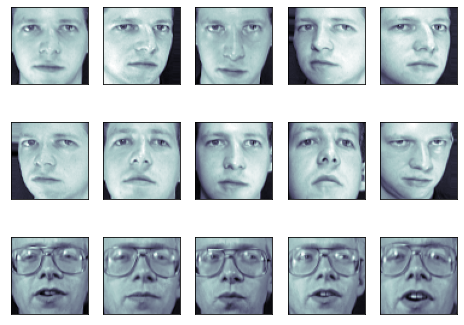

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
  ax.imshow(faces.images[i], cmap = plt.cm.bone)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


Decomposistion Step


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 150, whiten = True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

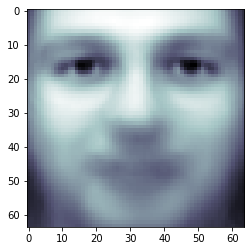

In [ ]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap = plt.cm.bone)

In [ ]:
print(pca.components_.shape)

(150, 4096)


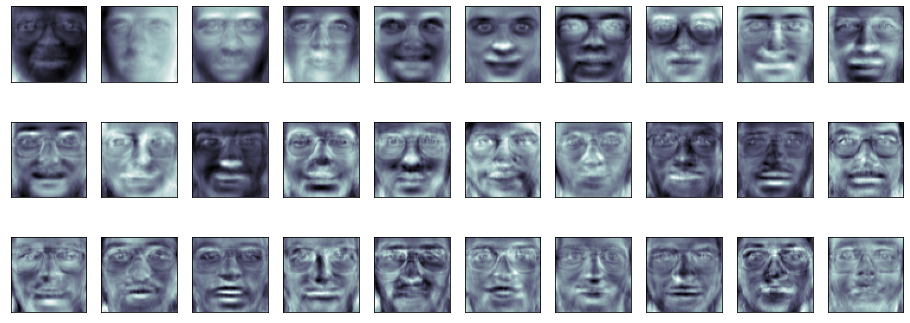

In [ ]:
fig = plt.figure(figsize = (16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks = [], yticks = [])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap = plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

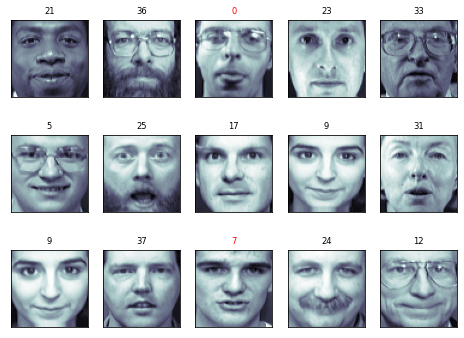

In [ ]:
import numpy as np
fig = plt.figure(figsize = (8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
  ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap = plt.cm.bone)

  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize = 'small', color = color)

In [ ]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         2
           2       0.60      1.00      0.75         3
           3       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4
           7       0.50      0.67      0.57         3
           8       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         3
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components = 150, whiten = True)), ('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
===============================================================================================================================================================

In [ ]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

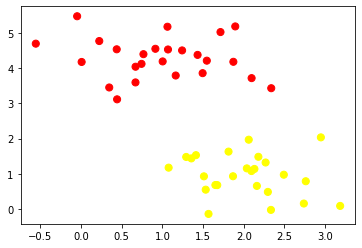

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

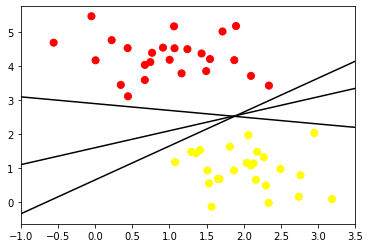

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

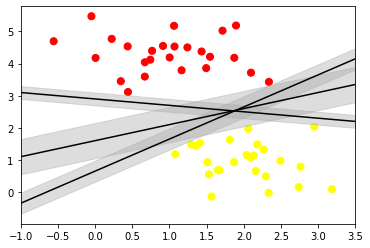

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none',
                     color = '#AAAAAA', alpha = 0.4)
plt.xlim(-1, 3.5);

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel = 'linear', C = 1E10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 104, test_size = 0.2, shuffle= True) 
model.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors = 'none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[-0.7425579  -0.41872382]
 [-0.7425579  -0.20584126]
 [-0.7425579   0.0070413 ]
 ...
 [ 3.37219203  5.32910536]
 [ 3.37219203  5.54198793]
 [ 3.37219203  5.75487049]]


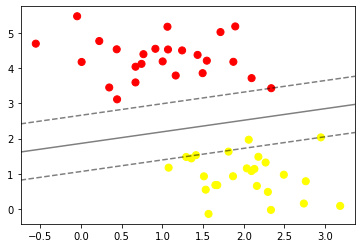

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[2.33812285, 3.43116792],
       [2.94821884, 2.03519717],
       [1.41281595, 1.5303347 ]])

In [ ]:
print("Accuracy: {}%".format(model.score(X_test, y_test) * 100))

Accuracy: 100.0%


[[-1.         -1.        ]
 [-1.         -0.75862069]
 [-1.         -0.51724138]
 ...
 [ 4.          5.51724138]
 [ 4.          5.75862069]
 [ 4.          6.        ]]
[[-1.         -1.        ]
 [-1.         -0.75862069]
 [-1.         -0.51724138]
 ...
 [ 4.          5.51724138]
 [ 4.          5.75862069]
 [ 4.          6.        ]]


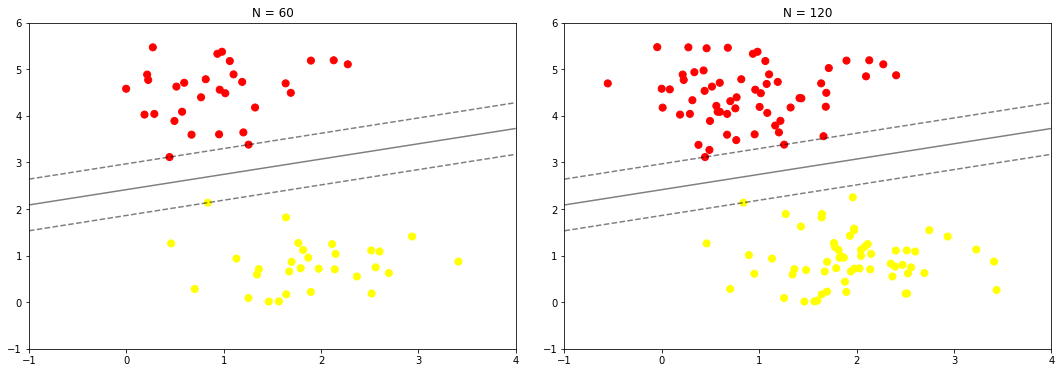

In [ ]:
def plot_svm(N = 10, ax = None):
    X, y = make_blobs(n_samples = 200, centers = 2, random_state = 0, cluster_std = 0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel = 'linear', C = 1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap ='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N = [10, 200], ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

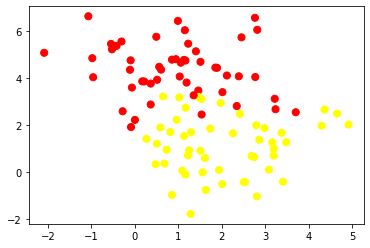

In [ ]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

[[-1.31751703 -1.21833219]
 [-1.31751703 -0.96246966]
 [-1.31751703 -0.70660714]
 ...
 [ 4.2131786   5.68995592]
 [ 4.2131786   5.94581845]
 [ 4.2131786   6.20168097]]
[[-1.31751703 -1.21833219]
 [-1.31751703 -0.96246966]
 [-1.31751703 -0.70660714]
 ...
 [ 4.2131786   5.68995592]
 [ 4.2131786   5.94581845]
 [ 4.2131786   6.20168097]]


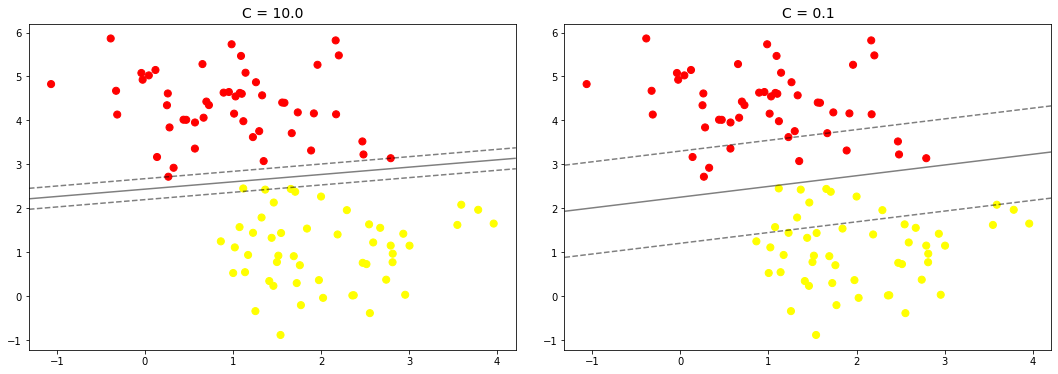

In [ ]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = 'linear', C = C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none')
    axi.set_title('C = {0:.1f}'.format(C), size = 14)